### Common Pandas Operations

We will use the data set from NYC OpenData called "New York City Leading Causes of Death".

In [2]:
%matplotlib inline
import requests
import pandas as pd
import numpy as np

#### Fetching the data


We fetch the data in JSON format using the NYC OpenData API:

In [3]:
# Data set: New York City Leading Causes of Death
# https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam
url = 'http://data.cityofnewyork.us/api/views/jb7j-dtam/rows.json'
results = requests.get(url).json()

In [4]:
results.keys()

dict_keys(['meta', 'data'])

There are two main fields in the returned JSON. The `meta` part that describes the metadata, and the actual `data`.

In [6]:
results['meta']['view'].keys()

dict_keys(['id', 'name', 'assetType', 'attribution', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'approvals', 'clientContext', 'columns', 'grants', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [8]:
results['data']

[['row-4i4k_viwv.tni6',
  '00000000-0000-0000-06C1-D2B03C031420',
  0,
  1670877352,
  None,
  1670877352,
  None,
  '{ }',
  '2011',
  'Chronic Lower Respiratory Diseases (J40-J47)',
  'M',
  'White Non-Hispanic',
  '444',
  '33.3',
  '27.8'],
 ['row-n8xz-jn4t.b7k8',
  '00000000-0000-0000-76B3-F180FF6D2247',
  0,
  1670877352,
  None,
  1670877352,
  None,
  '{ }',
  '2008',
  'Malignant Neoplasms (Cancer: C00-C97)',
  'M',
  'White Non-Hispanic',
  '3361',
  '250.4',
  '214.3'],
 ['row-mqty~zrkd_tcer',
  '00000000-0000-0000-E3D7-0E14D3F9949B',
  0,
  1670877352,
  None,
  1670877352,
  None,
  '{ }',
  '2010',
  'Chronic Liver Disease and Cirrhosis (K70, K73)',
  'M',
  'Hispanic',
  '150',
  '13.1',
  '17.6'],
 ['row-x57b_gzgg~xs25',
  '00000000-0000-0000-C055-1445774B71FE',
  0,
  1670877352,
  None,
  1670877352,
  None,
  '{ }',
  '2014',
  'Malignant Neoplasms (Cancer: C00-C97)',
  'M',
  'Hispanic',
  '1146',
  '96',
  '143.5'],
 ['row-tmfv~iwyc-zayd',
  '00000000-0000-0000-7F3

### Creating a DataFrame from JSON data

Let's create a pandas dataframe from the `results["data"]` part.

In [10]:
df = pd.DataFrame(results["data"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,row-4i4k_viwv.tni6,00000000-0000-0000-06C1-D2B03C031420,0,1670877352,None,1670877352,None,{ },2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,row-n8xz-jn4t.b7k8,00000000-0000-0000-76B3-F180FF6D2247,0,1670877352,None,1670877352,None,{ },2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,row-mqty~zrkd_tcer,00000000-0000-0000-E3D7-0E14D3F9949B,0,1670877352,None,1670877352,None,{ },2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,row-x57b_gzgg~xs25,00000000-0000-0000-C055-1445774B71FE,0,1670877352,None,1670877352,None,{ },2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,row-tmfv~iwyc-zayd,00000000-0000-0000-7F30-CF8500F65230,0,1670877352,None,1670877352,None,{ },2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,row-rqxm_5zjt.gndn,00000000-0000-0000-AA55-9CB249648081,0,1679513567,None,1679513567,None,{ },2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2,None,None
1799,row-4pcp.5irh~wc6i,00000000-0000-0000-56FF-5D6C58A867CF,0,1679513567,None,1679513567,None,{ },2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2,None,None
1800,row-mhn6~3ycg_iexv,00000000-0000-0000-D53E-6AAE3D9870FE,0,1679513567,None,1679513567,None,{ },2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2,None,None
1801,row-7siz.ffqx.w29r,00000000-0000-0000-CDE9-780139E10F0E,0,1679513567,None,1679513567,None,{ },2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2,None,None


### Adding Column Names

Hm, this is kind of ugly without column names...

We need to peek at the "meta" part to find information about the columns.

In [12]:
# This part of the results contains the description and names for the columns
columns = results["meta"]["view"]["columns"]
columns

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

In [14]:
# We will create a list of the column names, to reuse it when creating our dataframe
headers = [c["fieldName"] for c in columns]
headers

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

In [16]:
# Now we also pass a list of column names
df = pd.DataFrame(results["data"], columns=headers)
df

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,row-4i4k_viwv.tni6,00000000-0000-0000-06C1-D2B03C031420,0,1670877352,None,1670877352,None,{ },2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,row-n8xz-jn4t.b7k8,00000000-0000-0000-76B3-F180FF6D2247,0,1670877352,None,1670877352,None,{ },2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,row-mqty~zrkd_tcer,00000000-0000-0000-E3D7-0E14D3F9949B,0,1670877352,None,1670877352,None,{ },2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,row-x57b_gzgg~xs25,00000000-0000-0000-C055-1445774B71FE,0,1670877352,None,1670877352,None,{ },2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,row-tmfv~iwyc-zayd,00000000-0000-0000-7F30-CF8500F65230,0,1670877352,None,1670877352,None,{ },2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,row-rqxm_5zjt.gndn,00000000-0000-0000-AA55-9CB249648081,0,1679513567,None,1679513567,None,{ },2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2,None,None
1799,row-4pcp.5irh~wc6i,00000000-0000-0000-56FF-5D6C58A867CF,0,1679513567,None,1679513567,None,{ },2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2,None,None
1800,row-mhn6~3ycg_iexv,00000000-0000-0000-D53E-6AAE3D9870FE,0,1679513567,None,1679513567,None,{ },2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2,None,None
1801,row-7siz.ffqx.w29r,00000000-0000-0000-CDE9-780139E10F0E,0,1679513567,None,1679513567,None,{ },2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2,None,None


### Deleting Columns and/or Rows

We do not need all these columns. Let's drop a few that we will definitely not use. For that, we will use the `drop` command

In [18]:
df.drop(labels = [':sid', ':position', ':meta', ':created_meta', ':updated_meta'], 
        axis='columns', inplace=True)
df

,:id,:created_at,:updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-06C1-D2B03C031420,1670877352,1670877352,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,00000000-0000-0000-76B3-F180FF6D2247,1670877352,1670877352,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,00000000-0000-0000-E3D7-0E14D3F9949B,1670877352,1670877352,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,00000000-0000-0000-C055-1445774B71FE,1670877352,1670877352,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,00000000-0000-0000-7F30-CF8500F65230,1670877352,1670877352,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
...,...,...,...,...,...,...,...,...,...,...
1798,00000000-0000-0000-AA55-9CB249648081,1679513567,1679513567,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2,None,None
1799,00000000-0000-0000-56FF-5D6C58A867CF,1679513567,1679513567,2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2,None,None
1800,00000000-0000-0000-D53E-6AAE3D9870FE,1679513567,1679513567,2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2,None,None
1801,00000000-0000-0000-CDE9-780139E10F0E,1679513567,1679513567,2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2,None,None


##### Common Patterns: axis and inplace

* The `axis='columns'` says that we are looking to drop columns. If we had `axis='index'` we would be dropping rows with the passed id's. The ids for the row is the index value for the row.

* The `inplace=True` specifies that we will not be creating a new dataframe, but we just replace the current one, with the new dataframe that has fewer columns.

In [20]:
df

,:id,:created_at,:updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-06C1-D2B03C031420,1670877352,1670877352,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,00000000-0000-0000-76B3-F180FF6D2247,1670877352,1670877352,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,00000000-0000-0000-E3D7-0E14D3F9949B,1670877352,1670877352,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,00000000-0000-0000-C055-1445774B71FE,1670877352,1670877352,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,00000000-0000-0000-7F30-CF8500F65230,1670877352,1670877352,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
...,...,...,...,...,...,...,...,...,...,...
1798,00000000-0000-0000-AA55-9CB249648081,1679513567,1679513567,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2,None,None
1799,00000000-0000-0000-56FF-5D6C58A867CF,1679513567,1679513567,2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2,None,None
1800,00000000-0000-0000-D53E-6AAE3D9870FE,1679513567,1679513567,2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2,None,None
1801,00000000-0000-0000-CDE9-780139E10F0E,1679513567,1679513567,2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2,None,None


### Renaming Columns

We do not like some of these column names. Let's rename them.

We will use a dictionary, for specifying the existing and the new names for the columns.

In [22]:
# This dictionary specifies as a key the existing name of the column, and as value the new name
renaming_dict = {
    ':id': 'key', 
    ':created_at': 'created_at', 
    ':updated_at': 'updated_at'
}

df.rename(columns=renaming_dict, inplace=True)
df

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-06C1-D2B03C031420,1670877352,1670877352,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,00000000-0000-0000-76B3-F180FF6D2247,1670877352,1670877352,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,00000000-0000-0000-E3D7-0E14D3F9949B,1670877352,1670877352,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,00000000-0000-0000-C055-1445774B71FE,1670877352,1670877352,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,00000000-0000-0000-7F30-CF8500F65230,1670877352,1670877352,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
...,...,...,...,...,...,...,...,...,...,...
1798,00000000-0000-0000-AA55-9CB249648081,1679513567,1679513567,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2,None,None
1799,00000000-0000-0000-56FF-5D6C58A867CF,1679513567,1679513567,2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2,None,None
1800,00000000-0000-0000-D53E-6AAE3D9870FE,1679513567,1679513567,2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2,None,None
1801,00000000-0000-0000-CDE9-780139E10F0E,1679513567,1679513567,2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2,None,None


### Converting Data Types

In [24]:
df.dtypes

key                        object
created_at                  int64
updated_at                  int64
year                       object
leading_cause              object
sex                        object
race_ethnicity             object
deaths                     object
death_rate                 object
age_adjusted_death_rate    object
dtype: object

In [26]:
# Let's convert to the right data types the year,count,percent
df["year"] = pd.to_numeric(df["year"])
df.dtypes

key                        object
created_at                  int64
updated_at                  int64
year                        int64
leading_cause              object
sex                        object
race_ethnicity             object
deaths                     object
death_rate                 object
age_adjusted_death_rate    object
dtype: object

Sometimes, during the conversion of data, the cells contain values that cannot be properly converted. We can specify how we want pandas to handle such cases. By default, it will raise an exception, and will not allow us to convert the data to a new data type.

In [28]:
# This one will cause an error, as the "deaths" column contains non-numeric values.
# Try by uncommenting
# df["deaths"] = pd.to_numeric(df["deaths"])

We can pass the `errors` command to specify what should happen. From the [documentation of to_numeric](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html), we get:
* If ‘raise’, then invalid parsing will raise an exception
* If ‘coerce’, then invalid parsing will be set as NaN
* If ‘ignore’, then invalid parsing will return the input

In [29]:
df["deaths"] = pd.to_numeric(df["deaths"], errors='coerce')
df["death_rate"] = pd.to_numeric(df["death_rate"], errors='coerce')
df["age_adjusted_death_rate"] = pd.to_numeric(df["age_adjusted_death_rate"], errors='coerce')
df.dtypes

key                         object
created_at                   int64
updated_at                   int64
year                         int64
leading_cause               object
sex                         object
race_ethnicity              object
deaths                     float64
death_rate                 float64
age_adjusted_death_rate    float64
dtype: object

In [31]:
df

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,00000000-0000-0000-06C1-D2B03C031420,1670877352,1670877352,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444.0,33.3,27.8
1,00000000-0000-0000-76B3-F180FF6D2247,1670877352,1670877352,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361.0,250.4,214.3
2,00000000-0000-0000-E3D7-0E14D3F9949B,1670877352,1670877352,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150.0,13.1,17.6
3,00000000-0000-0000-C055-1445774B71FE,1670877352,1670877352,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146.0,96.0,143.5
4,00000000-0000-0000-7F30-CF8500F65230,1670877352,1670877352,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1798,00000000-0000-0000-AA55-9CB249648081,1679513567,1679513567,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2.0,NaN,NaN
1799,00000000-0000-0000-56FF-5D6C58A867CF,1679513567,1679513567,2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2.0,NaN,NaN
1800,00000000-0000-0000-D53E-6AAE3D9870FE,1679513567,1679513567,2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2.0,NaN,NaN
1801,00000000-0000-0000-CDE9-780139E10F0E,1679513567,1679513567,2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2.0,NaN,NaN


We will also mark the other values as Categorical.

In [33]:
df["sex"] = pd.Categorical(df["sex"])
df["race_ethnicity"] = pd.Categorical(df["race_ethnicity"])
df["leading_cause"] = pd.Categorical(df["leading_cause"])
df.dtypes

key                          object
created_at                    int64
updated_at                    int64
year                          int64
leading_cause              category
sex                        category
race_ethnicity             category
deaths                      float64
death_rate                  float64
age_adjusted_death_rate     float64
dtype: object

And we will also convert the timestamps to dates. Notice that we specify the unit to be `s` which is seconds since 1970.

In [35]:
df["created_at"] = pd.to_datetime(df["created_at"], unit='s')
df["updated_at"] = pd.to_datetime(df["updated_at"], unit='s')
df.dtypes

key                                object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
year                                int64
leading_cause                    category
sex                              category
race_ethnicity                   category
deaths                            float64
death_rate                        float64
age_adjusted_death_rate           float64
dtype: object

In [37]:
df.sort_values('year')

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
1069,00000000-0000-0000-F19B-B1BFA43EABE7,2022-12-12 20:35:52,2022-12-12 20:35:52,2007,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Black Non-Hispanic,87.0,8.300000,8.100000
502,00000000-0000-0000-F1CB-4FDADB69B0F4,2022-12-12 20:35:52,2022-12-12 20:35:52,2007,Diabetes Mellitus (E10-E14),M,Asian and Pacific Islander,47.0,9.700000,13.600000
1000,00000000-0000-0000-E5CC-2D553A5C1542,2022-12-12 20:35:52,2022-12-12 20:35:52,2007,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3518.0,245.200000,167.400000
124,00000000-0000-0000-7E48-4DBD5FD138CE,2022-12-12 20:35:52,2022-12-12 20:35:52,2007,All Other Causes,M,Black Non-Hispanic,1163.0,136.500000,162.400000
650,00000000-0000-0000-ABD8-3AE19A04966B,2022-12-12 20:35:52,2022-12-12 20:35:52,2007,Cerebrovascular Disease (Stroke: I60-I69),F,Hispanic,164.0,14.000000,18.300000
...,...,...,...,...,...,...,...,...,...,...
1333,00000000-0000-0000-53AE-6535102FAFA8,2023-03-22 17:53:46,2023-03-22 17:53:46,2019,Alzheimer's Disease (G30),Female,Non-Hispanic White,341.0,24.867168,10.508717
1332,00000000-0000-0000-C045-B076C6FFA233,2023-03-22 17:53:46,2023-03-22 17:53:46,2019,Cerebrovascular Disease (Stroke: I60-I69),Female,Non-Hispanic White,390.0,28.440457,14.419861
1331,00000000-0000-0000-45A0-084096AF8D03,2023-03-22 17:53:46,2023-03-22 17:53:46,2019,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic White,480.0,35.003639,19.225994
1329,00000000-0000-0000-1384-86D3CFF33E4D,2023-03-22 17:53:46,2023-03-22 17:53:46,2019,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Non-Hispanic White,4001.0,291.769915,141.564232


### Exploratory Data Analysis

In [39]:
df["race_ethnicity"].value_counts()

race_ethnicity
Other Race/ Ethnicity         340
Not Stated/Unknown            312
Asian and Pacific Islander    289
Hispanic                      287
Black Non-Hispanic            178
White Non-Hispanic            176
Non-Hispanic White            111
Non-Hispanic Black            110
Name: count, dtype: int64

In [41]:
df["sex"].value_counts()

sex
F         622
M         609
Female    288
Male      284
Name: count, dtype: int64

In [43]:
df["leading_cause"].value_counts()

leading_cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       156
All Other Causes                                                                                                                     156
Malignant Neoplasms (Cancer: C00-C97)                                                                                                156
Influenza (Flu) and Pneumonia (J09-J18)                                                                                              154
Diabetes Mellitus (E10-E14)                                                                                                          151
Cerebrovascular Disease (Stroke: I60-I69)                                                                                            149
Chronic Lower Respiratory Diseases (J40-J47)                                                                                         145
Essential Hypertension and 

### Pivot Tables

Let's create a pivot table now. We are going to put the "leading cause" as the row, with sex and race as columns. For the cell values we will use the number of deaths, and we are going to sum (`np.sum`) the values.

_Note: You will also find the `pivot` and `crosstab` functions in Pandas. The `pivot_table` function is typically a more general version of both._

In [45]:

import numpy as np
pivot = pd.pivot_table(df, 
                       values='deaths', 
                       index=['leading_cause'], # rows
                       columns=['sex', 'race_ethnicity'], # columns
                       aggfunc=np.sum) # aggregation function
pivot

sex                                                                         F  \
race_ethnicity                                     Asian and Pacific Islander   
leading_cause                                                                   
Accidents Except Drug Poisoning (V01-X39, X43, ...                       33.0   
Accidents Except Drug Posioning (V01-X39, X43, ...                      284.0   
All Other Causes                                                       2546.0   
Alzheimer's Disease (G30)                                               125.0   
Anemias (D50-D64)                                                         0.0   
Aortic Aneurysm and Dissection (I71)                                      0.0   
Assault (Homicide: U01-U02, Y87.1, X85-Y09)                               0.0   
Assault (Homicide: Y87.1, X85-Y09)                                        0.0   
Atherosclerosis (I70)                                                     0.0   
Cerebrovascular Disease (Stroke: I60-I69)                               791.0   
Certain Conditions originating in the Perinatal...                       18.0   
Cholelithiasis and Disorders of Gallbladder (K8...                        0.0   
Chronic Liver Disease and Cirrhosis (K70, K73)                            0.0   
Chronic Liver Disease and Cirrhosis (K70, K73-K74)                        0.0   
Chronic Lower Respiratory Diseases (J40-J47)                            289.0   
Complications of Medical and Surgical Care (Y40...                        0.0   
Congenital Malformations, Deformations, and Chr...                        0.0   
Diabetes Mellitus (E10-E14)                                             490.0   
Diseases of Heart (I00-I09, I11, I13, I20-I51)                         4039.0   
Essential Hypertension and Renal Diseases (I10,...                      335.0   
Human Immunodeficiency Virus Disease (HIV: B20-...                        0.0   
Influenza (Flu) and Pneumonia (J09-J18)                                 682.0   
Insitu or Benign / Uncertain Neoplasms (D00-D48)                          0.0   
Intentional Self-Harm (Suicide: U03, X60-X84, Y...                       28.0   
Intentional Self-Harm (Suicide: X60-X84, Y87.0)                         164.0   
Malignant Neoplasms (Cancer: C00-C97)                                  4022.0   
Meningitis (G00, G03)                                                     0.0   
Mental and Behavioral Disorders due to Accident...                        0.0   
Mental and Behavioral Disorders due to Use of A...                        0.0   
Nephritis, Nephrotic Syndrome and Nephrisis (N0...                       48.0   
Parkinson's Disease (G20)                                                 0.0   
Peptic Ulcer (K25-K28)                                                    0.0   
Pregnancy, Childbirth and the Puerperium (O00-O09)                        0.0   
Septicemia (A40-A41)                                                     16.0   
Tuberculosis (A16-A19)                                                    0.0   
Viral Hepatitis (B15-B19)                                                15.0   

sex                                                                    \
race_ethnicity                                     Black Non-Hispanic   
leading_cause                                                           
Accidents Except Drug Poisoning (V01-X39, X43, ...                0.0   
Accidents Except Drug Posioning (V01-X39, X43, ...              157.0   
All Other Causes                                              11178.0   
Alzheimer's Disease (G30)                                       601.0   
Anemias (D50-D64)                                                 0.0   
Aortic Aneurysm and Dissection (I71)                              0.0   
Assault (Homicide: U01-U02, Y87.1, X85-Y09)                       0.0   
Assault (Homicide: Y87.1, X85-Y09)                                0.0   
Atherosclerosis (I70)                

And we can easily transpose the dataframe

In [47]:
pivot.transpose()
# alternatively
# pivot.T

leading_cause                      Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)  \
sex    race_ethnicity                                                                                 
F      Asian and Pacific Islander                                               33.0                  
       Black Non-Hispanic                                                        0.0                  
       Hispanic                                                                 71.0                  
       Non-Hispanic Black                                                        0.0                  
       Non-Hispanic White                                                      177.0                  
       Not Stated/Unknown                                                        0.0                  
       Other Race/ Ethnicity                                                     0.0                  
       White Non-Hispanic                                                        0.0                  
Female Asian and Pacific Islander                                              153.0                  
       Black Non-Hispanic                                                        0.0                  
       Hispanic                                                                163.0                  
       Non-Hispanic Black                                                        0.0                  
       Non-Hispanic White                                                      678.0                  
       Not Stated/Unknown                                                       12.0                  
       Other Race/ Ethnicity                                                     4.0                  
       White Non-Hispanic                                                        0.0                  
M      Asian and Pacific Islander                                               84.0                  
       Black Non-Hispanic                                                        0.0                  
       Hispanic                                                                200.0                  
       Non-Hispanic Black                                                      129.0                  
       Non-Hispanic White                                                      244.0                  
       Not Stated/Unknown                                                       13.0                  
       Other Race/ Ethnicity                                                     8.0                  
       White Non-Hispanic                                                        0.0                  
Male   Asian and Pacific Islander                                              253.0                  
       Black Non-Hispanic                                                        0.0                  
       Hispanic                                                                719.0                  
       Non-Hispanic Black                                                      441.0                  
       Non-Hispanic White                                                     1093.0                  
       Not Stated/Unknown                                                       19.0                  
       Other Race/ Ethnicity                                                     7.0                  
       White Non-Hispanic                                                        0.0                  

leading_cause                      Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)  \
sex    race_ethnicity                                                                                 
F      Asian and Pacific Islander                                              284.0                  
       Black Non-Hispanic                                                      157.0                  
       Hispanic                                                                437.0 

<Axes: xlabel='sex,race_ethnicity'>

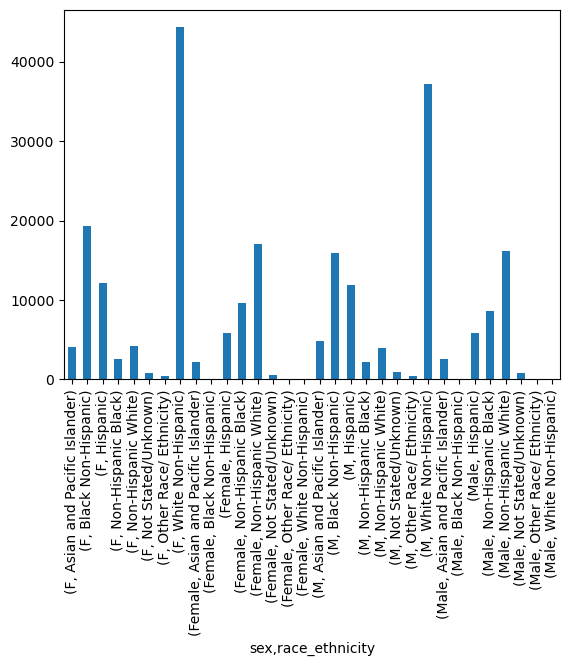

In [49]:
# And we can of course, plot:
pivot.transpose()["Diseases of Heart (I00-I09, I11, I13, I20-I51)"].plot.bar()

#### Exercises

* Write a function that will change the values for the "leading cause" column, and make them shorter. For example, we want to eliminate the codes within the parentheses; the value "Alzheimer's Disease (G30)" should become "Alzheimer's Disease". Use the `apply` function and/or the `map` function to create a new column with the shortened values. Then use the `drop` command to delete the old `leading_cause` column. 
* Change the pivot_table to compute the average `age_adjusted_death_rate` instead of the sum of deaths. (Hint: you can use the `numpy.mean` function to compute averages.

In [51]:
# Example input: 
# 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)
# Example output
# 'Accidents Except Drug Posioning'
import re

def shorten(cause):
    # Get everything before the parentheses
    regex_expression = r'(.*)\(.*\)' # notice that we escape the parentheses
    regex= re.compile(regex_expression)
    matches = regex.finditer(cause)
    for m in matches:
        return m.group(1).strip()[:30]
    return cause[:30]

shorten('Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)')

'Accidents Except Drug Posionin'

In [52]:
[shorten(cause) for cause in set(df['leading_cause'].values)]

['Anemias',
 'Cholelithiasis and Disorders o',
 'Tuberculosis',
 'All Other Causes',
 'Pregnancy, Childbirth and the ',
 'Viral Hepatitis',
 'Accidents Except Drug Posionin',
 'Chronic Liver Disease and Cirr',
 'Diseases of Heart',
 'Assault',
 'Aortic Aneurysm and Dissection',
 'Accidents Except Drug Poisonin',
 "Parkinson's Disease",
 'Complications of Medical and S',
 'Assault',
 'Atherosclerosis',
 'Intentional Self-Harm',
 'Certain Conditions originating',
 'Insitu or Benign / Uncertain N',
 'Human Immunodeficiency Virus D',
 'Congenital Malformations, Defo',
 'Malignant Neoplasms',
 'Essential Hypertension and Ren',
 'Intentional Self-Harm',
 'Mental and Behavioral Disorder',
 'Influenza (Flu) and Pneumonia',
 'Diabetes Mellitus',
 'Chronic Lower Respiratory Dise',
 'Chronic Liver Disease and Cirr',
 'Septicemia',
 'Nephritis, Nephrotic Syndrome ',
 'Meningitis',
 'Cerebrovascular Disease',
 'Peptic Ulcer',
 "Alzheimer's Disease",
 'Mental and Behavioral Disorder']

In [53]:
df["cause"] = df["leading_cause"].apply(shorten)
df

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,cause
0,00000000-0000-0000-06C1-D2B03C031420,2022-12-12 20:35:52,2022-12-12 20:35:52,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444.0,33.3,27.8,Chronic Lower Respiratory Dise
1,00000000-0000-0000-76B3-F180FF6D2247,2022-12-12 20:35:52,2022-12-12 20:35:52,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361.0,250.4,214.3,Malignant Neoplasms
2,00000000-0000-0000-E3D7-0E14D3F9949B,2022-12-12 20:35:52,2022-12-12 20:35:52,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150.0,13.1,17.6,Chronic Liver Disease and Cirr
3,00000000-0000-0000-C055-1445774B71FE,2022-12-12 20:35:52,2022-12-12 20:35:52,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146.0,96.0,143.5,Malignant Neoplasms
4,00000000-0000-0000-7F30-CF8500F65230,2022-12-12 20:35:52,2022-12-12 20:35:52,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25.0,NaN,NaN,Certain Conditions originating
...,...,...,...,...,...,...,...,...,...,...,...
1798,00000000-0000-0000-AA55-9CB249648081,2023-03-22 19:32:47,2023-03-22 19:32:47,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2.0,NaN,NaN,Chronic Liver Disease and Cirr
1799,00000000-0000-0000-56FF-5D6C58A867CF,2023-03-22 19:32:47,2023-03-22 19:32:47,2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2.0,NaN,NaN,Aortic Aneurysm and Dissection
1800,00000000-0000-0000-D53E-6AAE3D9870FE,2023-03-22 19:32:47,2023-03-22 19:32:47,2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2.0,NaN,NaN,Alzheimer's Disease
1801,00000000-0000-0000-CDE9-780139E10F0E,2023-03-22 19:32:47,2023-03-22 19:32:47,2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2.0,NaN,NaN,Septicemia


In [54]:

import numpy as np
pivot = pd.pivot_table(df, 
                       values='deaths', 
                       index=['cause'], # rows
                       columns=['sex', 'race_ethnicity'], # columns
                       aggfunc=np.mean) # aggregation function
pivot

sex                                                     F                     \
race_ethnicity                 Asian and Pacific Islander Black Non-Hispanic   
cause                                                                          
Accidents Except Drug Poisonin                  33.000000                NaN   
Accidents Except Drug Posionin                  35.500000          78.500000   
All Other Causes                               282.888889        1397.250000   
Alzheimer's Disease                             31.250000         100.166667   
Anemias                                               NaN                NaN   
Aortic Aneurysm and Dissection                        NaN                NaN   
Assault                                               NaN                NaN   
Atherosclerosis                                       NaN                NaN   
Cerebrovascular Disease                         87.888889         268.375000   
Certain Conditions originating                  18.000000                NaN   
Cholelithiasis and Disorders o                        NaN                NaN   
Chronic Liver Disease and Cirr                        NaN                NaN   
Chronic Lower Respiratory Dise                  32.111111         206.375000   
Complications of Medical and S                        NaN                NaN   
Congenital Malformations, Defo                        NaN                NaN   
Diabetes Mellitus                               54.444444         391.625000   
Diseases of Heart                              448.777778        2416.875000   
Essential Hypertension and Ren                  37.222222         215.375000   
Human Immunodeficiency Virus D                        NaN         165.500000   
Influenza (Flu) and Pneumonia                   75.777778         286.000000   
Insitu or Benign / Uncertain N                        NaN                NaN   
Intentional Self-Harm                           24.000000                NaN   
Malignant Neoplasms                            446.888889        1815.625000   
Meningitis                                            NaN                NaN   
Mental and Behavioral Disorder                        NaN          87.000000   
Nephritis, Nephrotic Syndrome                   16.000000          82.000000   
Parkinson's Disease                                   NaN                NaN   
Peptic Ulcer                                          NaN                NaN   
Pregnancy, Childbirth and the                         NaN                NaN   
Septicemia                                      16.000000          89.000000   
Viral Hepatitis                                 15.000000                NaN   

sex                                                             \
race_ethnicity                     Hispanic Non-Hispanic Black   
cause                                                            
Accidents Except Drug Poisonin    71.000000                NaN   
Accidents Except Drug Posionin    62.428571                NaN   
All Other Causes                1002.222222             1541.0   
Alzheimer's Disease              121.142857              160.0   
Anemias                                 NaN                NaN   
Aortic Aneurysm and Dissection          NaN                NaN   
Assault                                 NaN                NaN   
Atherosclerosis                         NaN                NaN   
Cerebrovascular Disease          185.777778              299.0   
Certain Conditions originating          NaN                NaN   
Cholelithiasis and Disorders o          NaN                NaN   
Chronic Liver Disease and Cirr    61.000000                NaN   
Chronic Lower Respiratory Dise   163.222222              257.0   
Complications of Medical and S          NaN                NaN   
Congenital Malformations, Defo          NaN                NaN   
Diabetes Mellitus                214.333333              407.0   
Diseases of Heart        

#### Exercise

* Get a new dataset from NYC Open Data. (Go for something small.) Fetch it and load it into a dataframe. Put the right column names into the dataframe, eliminate columns and rows that you do not need. Create a basic plot that summarizes some aspect of the dataset.